# <font color = 'Red'>Implementation of Image Web Scraping</font>

## <font color = 'Orange'>Scraping With Mask Dataset</font>

### <font color = 'Orange'>Step1. Import all required libraries</font>

In [7]:
#Import libraries
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException

### <font color = 'Orange'>Step2. Install Chrome Driver</font>

In [8]:
#Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [/Users/mons/.wdm/drivers/chromedriver/mac64/91.0.4472.101/chromedriver] found in cache


### <font color = 'Orange'>Step3. Specify Search url</font>

In [9]:
#Specify Search URL
search_url = "https://www.google.com/search?q={q}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568"
driver.get(search_url.format(q='wearing mask'))

### <font color = 'Orange'>Step4. Scroll to the end of the page</font>

In [10]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions  


### <font color = 'Orange'>Step5. Locate the images to be scraped from the page</font>

In [11]:
#Locate the images to be scraped from the current page
imgResults = driver.find_elements_by_xpath('//img[contains(@class,"rg_i") and contains(@class, "Q4LuWd")]')
totalResults=len(imgResults)

### <font color = 'Orange'>Step6. Extract corresponding link of each Image</font>

Message: element click intercepted: Element  is not clickable at point (119, 537). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 440px;">...</div>
  (Session info: chrome=91.0.4472.101)


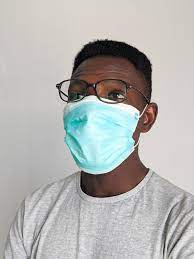

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="145" height="218" alt="HD wallpaper: woman wearing teal mask and gray turtle-neck shirt, woman  wearing grey turtleneck long-sleeved shirt and blue face mask | Wallpaper  Flare" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiD35B6gkCXPik9-HWf-ZAdPwd8ADrLY8Wzw&amp;usqp=CAU"> is not clickable at point (92, 538). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 440px;">...</div>
  (Session info: chrome=91.0.4472.101)

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="174" height="231" alt="woman, wearing, white, headscarf, covering, face, black background,  headshot | Piqsels" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLUFRVXelQX_RgkEuvggs_eENo72_eFf95lg&amp;usqp=CAU"> is not clickable at point (1

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=91.0.4472.101)


In [12]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

### <font color = 'Orange'>Step7. Download & save each image in Destination directory</font>

In [13]:
os.chdir('/Users/mons/Desktop/DL project/data/mask')
baseDir=os.getcwd()

for i, url in enumerate(img_urls):
    file_name = f"{i:250}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHhj3zarfJ9YZSe--6rXNLzxGsjcoXIjar_w&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                                                                                                                                                                                                         0.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQZfzIhkV_oz6hveXPyrVDNibladbo0m5DAA&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                                                                                                                                                                                                         1.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiD35B6gkCXPik9-HWf-ZAdPwd8ADrLY8Wzw&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                         

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSO8YuxIKQ47Xp-vdiyPAgFuA6UV-h-fGdbEA&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                                                                                                                                                                                                        21.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu9uvDlwRnsjY4PiuvPmnB-RdGbDbK73a67Q&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                                                                                                                                                                                                        22.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-9jw_y6fJY2e-Wsdf9raxDhoYSleWwZlq-w&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                         

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2Ip1RCG7W82fjCKIk0bYcdNiXgSbhnAjskQ&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                                                                                                                                                                                                        43.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyH6lTOgY-c9Xk7MPksVhhrBIItbWILTtUeQ&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                                                                                                                                                                                                        44.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0gHUijI9iZ06mL23htpBv6TnibWphfFtb8g&usqp=CAU - AT: /Users/mons/Desktop/mask/                                                                         

## <font color = 'Orange'>Scraping No Mask Dataset</font>

In [14]:
#Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [/Users/mons/.wdm/drivers/chromedriver/mac64/91.0.4472.101/chromedriver] found in cache


In [16]:
#Specify Search URL
search_url = "https://www.google.com/search?q=person+images&tbm=isch&ved=2ahUKEwiBhNGa6JTxAhXbLSsKHToXAd4Q2-cCegQIABAA&oq=person+images&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BwgjEOoCECc6BAgjECc6BAgAEEM6BQgAELEDOgcIABCxAxBDUIM1WOFYYLFaaAJwAHgAgAGBAYgB9gmSAQQxMi4ymAEAoAEBqgELZ3dzLXdpei1pbWewAQrAAQE&sclient=img&ei=WhXGYIHvHtvbrAG6roTwDQ&bih=689&biw=1280"
driver.get(search_url.format(q='not wearing mask'))

In [17]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions  

In [18]:
#Locate the images to be scraped from the current page
imgResults = driver.find_elements_by_xpath('//img[contains(@class,"rg_i") and contains(@class, "Q4LuWd")]')
totalResults=len(imgResults)

In [19]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="145" height="218" alt="300,000+ Best Person Photos · 100% Free Download · Pexels Stock Photos" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZKtdoYgBrGLeu8xaVACCyfE6CcD8SbZAdjQ&amp;usqp=CAU"> is not clickable at point (92, 538). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 682px;">...</div>
  (Session info: chrome=91.0.4472.101)



In [22]:
os.chdir('/Users/mons/Desktop/DL project/data/nomask')
baseDir=os.getcwd()

for i, url in enumerate(img_urls):
    file_name = f"{i:250}.jpg"    
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - COULD NOT DOWNLOAD {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        
        file_path = os.path.join(baseDir, file_name)
        
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SAVED - {url} - AT: {file_path}")
    except Exception as e:
        print(f"ERROR - COULD NOT SAVE {url} - {e}")

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQi8TBDW57ModHYlAdhqR1uU7Hq5ZVVh-nkFA&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                         0.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0rfm7ulLh-hULWlR8NBtrIwRCCWql8VQ9zw&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                         1.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTajClwx0LhTrM8e6jvdc6hRwPRfIZ-lNlqIg&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                   

SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuWlKVGJeILLo6n3_-9GgvdvWyz7MJbC1o7g&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        23.jpg
SAVED - https://www.theglobeandmail.com/resizer/wgr5EMgEXIOcA7rDmsy1uNcjl6E=/1200x0/filters:quality(80)/cloudfront-us-east-1.images.arcpublishing.com/tgam/KCRVJFVYN5DQNOKI5YFY4PGAXE.jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        24.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCc2ULjz_BX_a91BvhR-9tXfknyrIDOoFGfQ&usqp=CAU - AT: /Users/mons/Desk

SAVED - https://static.toiimg.com/photo/82909777/82909777.jpg?v=3 - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        44.jpg
SAVED - https://i.ytimg.com/vi/7I8OeQs7cQA/maxresdefault.jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        45.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQDwnb8KCy8eejkddV5FaKsBcm1uDznQhInOQ&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                            

SAVED - https://img.freepik.com/free-photo/mand-holding-cup_1258-340.jpg?size=626&ext=jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        66.jpg
SAVED - https://content.fortune.com/wp-content/uploads/2018/07/gettyimages-961697338.jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        67.jpg
SAVED - https://st3.depositphotos.com/9881890/16378/i/600/depositphotos_163785870-stock-photo-blonde-smiling-businesswoman.jpg - AT: /Users/mons/Desktop/nomask/                                                                                     

SAVED - https://images.pexels.com/photos/3772771/pexels-photo-3772771.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500 - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        87.jpg
SAVED - https://image.shutterstock.com/image-photo/multi-ethnic-people-different-age-260nw-1733849612.jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                        88.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxrcp37OMk5VPHX_iXqMZ1w5tXZyuvXV6IVg&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                

SAVED - https://api.time.com/wp-content/uploads/2017/12/terry-crews-person-of-year-2017-time-magazine-facebook-1.jpg?quality=85 - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       108.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQikgkSiVP98QmireW5lSO8Squ5Ump6busHew&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       109.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCThi5j1uwZ41zjKSU5_1dg5y1Ss64h4eeOQ&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                               

SAVED - https://img.freepik.com/free-photo/confident-young-man_1098-20868.jpg?size=626&ext=jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       129.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaOe5mreqOpNXUmb9-5Qlt6VB0nBkEg6QkqQ&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       130.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsyAY09Skz2WsEZjo6YnHKp2AObo7VT4WHbA&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                

SAVED - https://i.ytimg.com/vi/h40Ogiq32Ps/maxresdefault.jpg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       151.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeKZYYfBtlYAVrWfSk1xL-h2RYJ99059nA-A&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       152.jpg
SAVED - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYMx1bx9W-L2lS15GP2jbBplVDSUSIgZ7jWw&usqp=CAU - AT: /Users/mons/Desktop/nomask/                                                                                                                  

SAVED - https://trak.in/wp-content/uploads/2020/12/5c93b4a4daa507033b17202a-1024x512-1280x720-1024x576.jpeg - AT: /Users/mons/Desktop/nomask/                                                                                                                                                                                                                                                       173.jpg
